In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , mean_absolute_error, mean_squared_error, r2_score

In [26]:
dataset=pd.read_csv("kc_house_data.csv").copy()

In [27]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [28]:
dataframe = pd.DataFrame(dataset)

In [29]:
dataframe.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
dataframe.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [31]:
dataframe.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [32]:
#converting the type of nb of floors as int
dataframe['floors']=dataframe['floors'].astype(int)

In [33]:
dataframe['bathrooms']=dataframe['bathrooms'].astype(int)

In [34]:
#on inverse le signe le la colonne long car elle est negative
dataframe['long'] = dataframe['long'].apply(lambda x: -x)

In [35]:
dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,122.069,1410,1287


In [36]:
dataframe = dataframe.drop(columns=['waterfront'])

In [37]:
dataframe = dataframe.drop(columns=['view'])

In [38]:
dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,3,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,3,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,3,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,5,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,3,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3,3,8,1530,0,2009,0,98103,47.6993,122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2,3,8,2310,0,2014,0,98146,47.5107,122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2,3,7,1020,0,2009,0,98144,47.5944,122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2,3,8,1600,0,2004,0,98027,47.5345,122.069,1410,1287


In [39]:
y = dataframe['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [40]:
datatempo = dataframe.drop(['price'],axis=1)

In [41]:
x = datatempo.drop(['date'],axis=1)
x

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1,1180,5650,1,3,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,6414100192,3,2,2570,7242,2,3,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,5631500400,2,1,770,10000,1,3,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,2487200875,4,3,1960,5000,1,5,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,1954400510,3,2,1680,8080,1,3,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2,1530,1131,3,3,8,1530,0,2009,0,98103,47.6993,122.346,1530,1509
21609,6600060120,4,2,2310,5813,2,3,8,2310,0,2014,0,98146,47.5107,122.362,1830,7200
21610,1523300141,2,0,1020,1350,2,3,7,1020,0,2009,0,98144,47.5944,122.299,1020,2007
21611,291310100,3,2,1600,2388,2,3,8,1600,0,2004,0,98027,47.5345,122.069,1410,1287


In [53]:
#Split your dataset into a training set and a testing set
x_test , x_train , y_test , y_train = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [54]:
#Apply linear regression to your training set
model = LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [55]:
y_pred =model.predict(x_test)

Text(0, 0.5, 'Prix prédit')

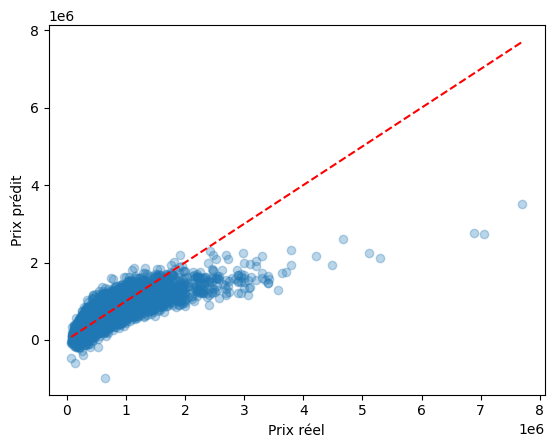

In [78]:
#compare realite et prediction
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--')
plt.xlabel('Prix réel')
plt.ylabel('Prix prédit')

In [80]:
# performance
print("R² score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

R² score : 0.6612305468664568
MAE : 133964.97858317988
RMSE : 210380.03572948408


In [84]:
# comparaison avec random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
# result de random forest
print("R² Random Forest :", r2_score(y_test, y_pred_rf))

R² Random Forest : 0.8305218673902294


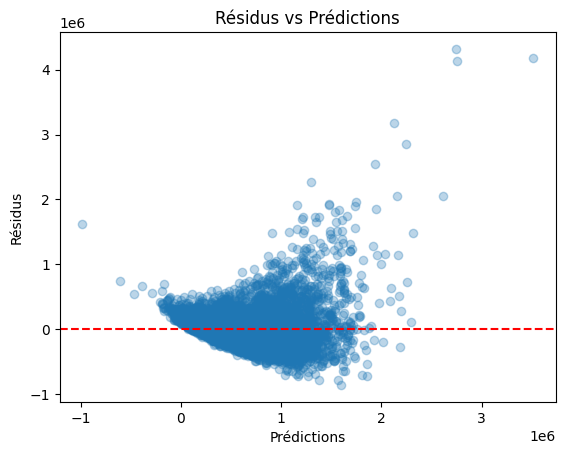

In [87]:
residus = y_test - y_pred
plt.scatter(y_pred, residus, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Résidus vs Prédictions')
plt.show()